# 標本分散とχ2乗分布

標本分散

$ s^{2} = \frac{|(x_{1} - \mu_{s})^{2} + (x_{2} - \mu_{s})^{2} + (x_{3} - \mu_{s})^{2} + \cdots|}{n} $

χ2乗分布 <- 標準正規母集団の標本から導く

Xは互いに独立な標準正規分布に従う確率変数であるとする

$ V = X_{1}^{2} + X_{2}^{2} + X_{3}^{2} + \cdots $

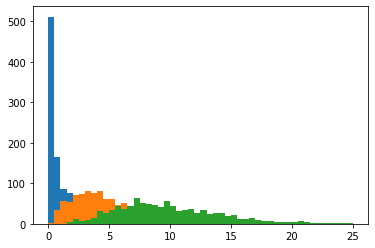

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_x_square_values(dof):
    if dof <= 0:
        raise Exception('dof must be larger than 0')
    # 標準正規分布からサンプリング
    s = [norm.rvs(loc=0, scale=1)**2 for i in range(dof)]
    # その総和
    v = sum(s)
    return v

try_num = 1000
vs_1 = [generate_x_square_values(1) for i in range(try_num)]
vs_5 = [generate_x_square_values(5) for i in range(try_num)]
vs_10 = [generate_x_square_values(10) for i in range(try_num)]

plt.hist(vs_1, bins=50, range=(0, 25))
plt.hist(vs_5, bins=50, range=(0, 25))
plt.hist(vs_10, bins=50, range=(0, 25))
plt.show()

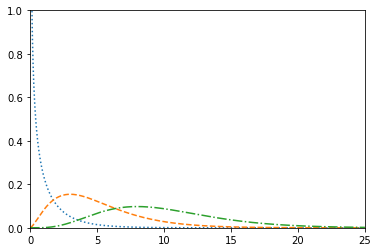

In [26]:
from scipy.stats import chi2

x = np.linspace(0, 25, 1000)
 
linestyles = [':', '--', '-.']
deg_of_freedom = [1, 5, 10]
for k, ls in zip(deg_of_freedom, linestyles):
  plt.plot(x, chi2.pdf(x, k), linestyle=ls)
 
plt.xlim(0, 25)
plt.ylim(0, 1.0)
 
plt.show()

In [39]:
import pandas as pd
import numpy as np

# ある値以上の値が出る確率

num = 1000
range_max = 25

# 自由度3の場合
# 0以上
print(chi2.cdf(100, 3) - chi2.cdf(0, 3))
# 1以上
print(chi2.cdf(100, 3) - chi2.cdf(1, 3))
# 2以上
print(chi2.cdf(100, 3) - chi2.cdf(2, 3))

# まとめて処理
dofs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
base_values = np.linspace(0, 25, 2500)

chi2_table = list()
for base_value in base_values:
    rows = list()
    for dof in dofs:
        rows.append(chi2.cdf(100, dof) - chi2.cdf(base_value, dof))
    chi2_table.append(rows)
    
df = pd.DataFrame(chi2_table)
df.index = ['base_value_{:.3}'.format(i) for i in base_values]
df.columns = ['dof_{}'.format(i) for i in dofs]
df.to_csv('/tmp/chi2_table.csv')

1.0
0.8012519569012009
0.5724067044708798
